In [1]:
import numpy
from skimage import io
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def plot_one_bb(image,bb):
    xmin, ymin, width, height = bb[0], bb[1], bb[2], bb[3]
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Create a Rectangle patch
    rect = patches.Rectangle((xmin,ymin),width,height,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()

In [3]:
def plot_all_bb(image,bb_list):
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)
    
    for bb in bb_list:
        xmin, ymin, width, height = bb[0], bb[1], bb[2], bb[3]

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin,ymin),width,height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [4]:
train_labels_df = pd.read_csv("../data/train.csv")

In [5]:
train_labels_df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


b6ab77fd7
[834.0, 222.0, 56.0, 36.0]


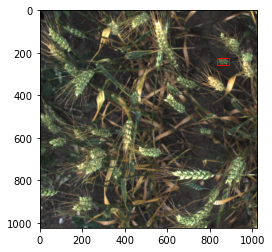

b6ab77fd7
[226.0, 548.0, 130.0, 58.0]


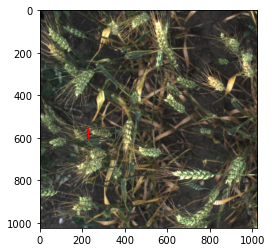

b6ab77fd7
[377.0, 504.0, 74.0, 160.0]


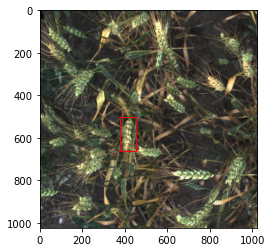

b6ab77fd7
[834.0, 95.0, 109.0, 107.0]


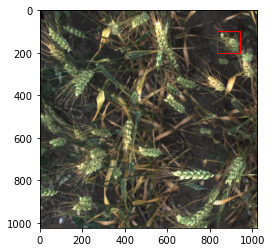

b6ab77fd7
[26.0, 144.0, 124.0, 117.0]


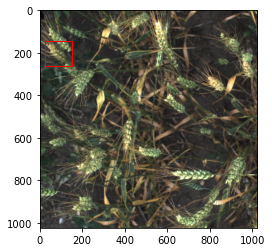

b6ab77fd7
[569.0, 382.0, 119.0, 111.0]


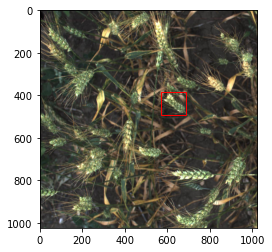

b6ab77fd7
[52.0, 602.0, 82.0, 45.0]


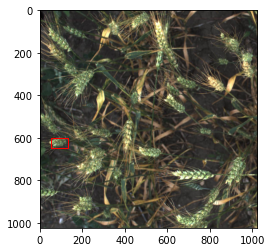

b6ab77fd7
[627.0, 302.0, 122.0, 75.0]


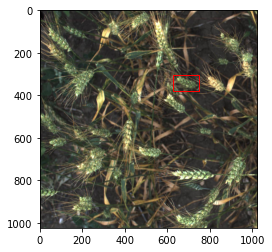

b6ab77fd7
[412.0, 367.0, 68.0, 82.0]


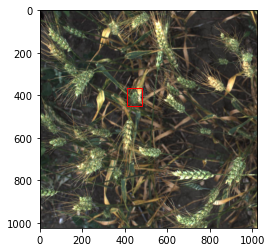

b6ab77fd7
[953.0, 220.0, 56.0, 103.0]


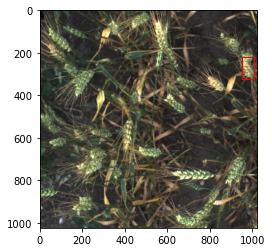

In [6]:
#selecting columns with image_id and bbox to plot
to_plot_df = train_labels_df[['image_id','bbox']]
i=0
#this loop can be used to plot only 1 bb on the image 
for index, row in to_plot_df.iterrows():
    #get values for the current row
    image_id = row['image_id']
    bb = row['bbox']
    
    #remove opening and closing brackets
    bb = bb[1:-1]
    #split on ,
    bb = bb.split(",")
    #convert str to float
    bb = [float(i) for i in bb]
    
    print(image_id)
    print(bb)
    
    #get image 
    image_path = os.path.join("../data/train/",image_id+".jpg")
    image = io.imread(image_path)
    
    plot_one_bb(image,bb)
    
    i+=1
    if i==10:
        break

Number of bbs in image 00333207f=55


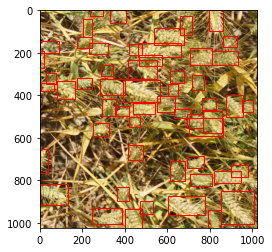

Number of bbs in image 005b0d8bb=20


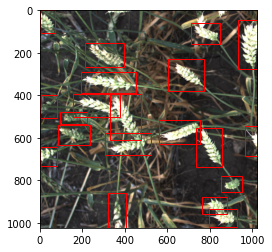

Number of bbs in image 006a994f7=25


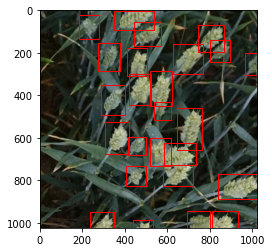

Number of bbs in image 00764ad5d=41


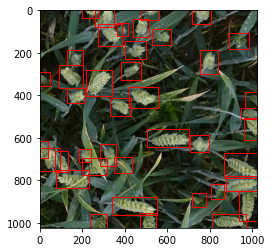

Number of bbs in image 00b5fefed=25


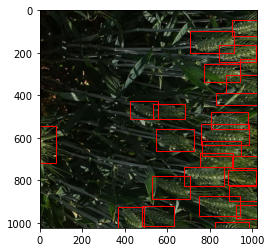

Number of bbs in image 00b70a919=7


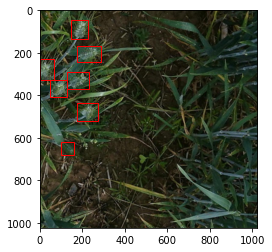

Number of bbs in image 00e903abe=43


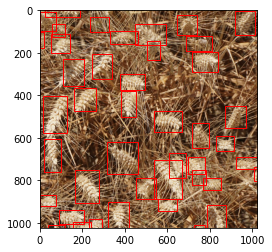

Number of bbs in image 00ea5e5ee=55


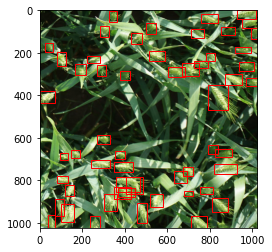

Number of bbs in image 010b216d4=36


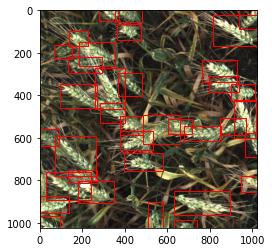

Number of bbs in image 010c93b99=16


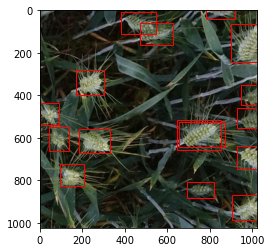

In [7]:
labels_grouped_df = to_plot_df.groupby(by='image_id')['bbox'].apply(list).reset_index(name='bb_list')
i=0
#this loop can be used to plot only 1 bb on the image 
for index, row in labels_grouped_df.iterrows():
    #get values for the current row
    image_id = row['image_id']
    #print(image_id)
    
    #get image 
    image_path = os.path.join("../data/train/",image_id+".jpg")
    image = io.imread(image_path)
    
    bb_list = row['bb_list']
    print("Number of bbs in image %s=%d"%(image_id,len(bb_list)))
    
    #list to store all bbs
    float_bb_list = []
    for bb in bb_list:
        #remove opening and closing brackets
        bb = bb[1:-1]
        #split on ,
        bb = bb.split(",")
        #convert str to float
        bb = [float(i) for i in bb]
        #print(bb)
        float_bb_list.append(bb)
    #print(len(float_bb_list)) 
    
    plot_all_bb(image,float_bb_list)
    
    i+=1
    if i==10:
        break


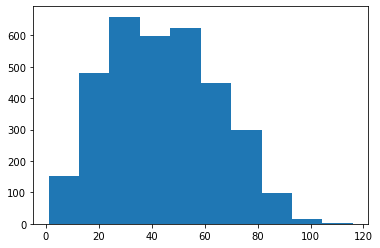

Mean number of bbs 43.8164838422769
Median number of bbs 43


In [10]:
#plot the distribution of the number of bbs present per image

from statistics import mean,median
number_of_bbs = []
for index, row in labels_grouped_df.iterrows():
    bb_list = row['bb_list']
    number_of_bbs.append(len(bb_list))

plt.hist(number_of_bbs)
plt.show()

print("Mean number of bbs per image",mean(number_of_bbs))
print("Median number of bbs per image",median(number_of_bbs))

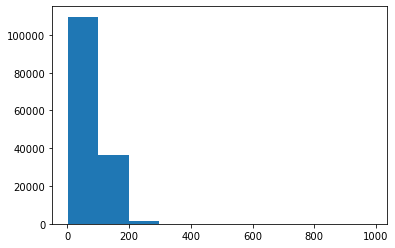

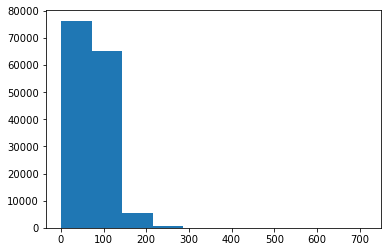

Mean width of bbs 84.43505984721874
Median width of bbs 78.0
Mean height of bbs 76.92730575873011
Median height of bbs 71.0


In [18]:
#get distribution of width and height of bbs

all_widths = []
all_heights = []
for index, row in to_plot_df.iterrows():
    #get values for the current row
    image_id = row['image_id']
    bb = row['bbox']
    
    #remove opening and closing brackets
    bb = bb[1:-1]
    #split on ,
    bb = bb.split(",")
    #convert str to float
    bb = [float(i) for i in bb]
    
    all_widths.append(bb[2])
    all_heights.append(bb[3])

plt.hist(all_widths)
plt.show()
plt.hist(all_heights)
plt.show()

print("Mean width of bbs",mean(all_widths))
print("Median width of bbs",median(all_widths))
print("Mean height of bbs",mean(all_heights))
print("Median height of bbs",median(all_heights))

In [16]:
#count of number of images from every source
no_duplicates_df = train_labels_df.drop_duplicates(subset='image_id')
no_duplicates_df.groupby('source').agg('count')

,image_id,width,height,bbox
source,,,,
arvalis_1,1055,1055,1055,1055
arvalis_2,204,204,204,204
arvalis_3,559,559,559,559
ethz_1,747,747,747,747
inrae_1,176,176,176,176
rres_1,432,432,432,432
usask_1,200,200,200,200
